In [1]:
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
# print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.1-arm64-arm-64bit
Tensor Flow Version: 2.9.0

Python 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
GPU is available


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [7]:
X_train_scaled[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [8]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

In [9]:
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [10]:
model = keras.Sequential([tf.keras.layers.Flatten(input_shape=(32,32,3)),
              tf.keras.layers.Dense(3000, activation='relu'),
              tf.keras.layers.Dense(1000, activation='relu'),
              tf.keras.layers.Dense(10, activation='sigmoid')
             ])
model.compile(optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

Metal device set to: Apple M1


2023-02-17 19:41:27.427411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 19:41:27.429836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
%%timeit -n1 -r1
model.fit(X_test_scaled, y_test_categorical, epochs=100)

Epoch 1/100


2023-02-17 19:41:27.825821: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 19:41:27.985089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 1.9959 - accuracy: 0.2792
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 1.8142 - accuracy: 0.3613
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 1.7256 - accuracy: 0.3919
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 1.6615 - accuracy: 0.4197
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 1.6106 - accuracy: 0.4382
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 1.5689 - accuracy: 0.4509
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 1.5362 - accuracy: 0.4628
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 1.5015 - accuracy: 0.4739
Epoch 9/100
313/313 [==============================] - 3s 10ms/step - loss: 1.4728 - accuracy: 0.4844
Epoch 10/100
313/313 [==============================] - 3s 10ms/step - loss: 1.4359 - accuracy

313/313 [==============================] - 3s 10ms/step - loss: 0.1539 - accuracy: 0.9690
Epoch 81/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1365 - accuracy: 0.9723
Epoch 82/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1321 - accuracy: 0.9742
Epoch 83/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1359 - accuracy: 0.9711
Epoch 84/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1268 - accuracy: 0.9757
Epoch 85/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1258 - accuracy: 0.9764
Epoch 86/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1084 - accuracy: 0.9804
Epoch 87/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1002 - accuracy: 0.9834
Epoch 88/100
313/313 [==============================] - 3s 10ms/step - loss: 0.0992 - accuracy: 0.9838
Epoch 89/100
313/313 [==============================] - 3s 10ms/step - loss: 0.0906 - 

In [12]:
def plot_sample(index):
    plt.figure(figsize= (10,1))
    plt.imshow(X_test[index])

In [13]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def test():
    img = int(input("Enter Image number between 0-9999:"))
    print("Image number", img, "is", classes[np.argmax(model.predict(X_test_scaled)[img])])
    print("Do you wish to verify? (y/n)")
    if input() == 'y':
        plt.imshow(X_test[img])
    elif input() == 'n':
        return

Enter Image number between 0-9999:9
313/313 [==============================] - 2s 5ms/step
Image number 9 is automobile
Do you wish to verify? (y/n)
y


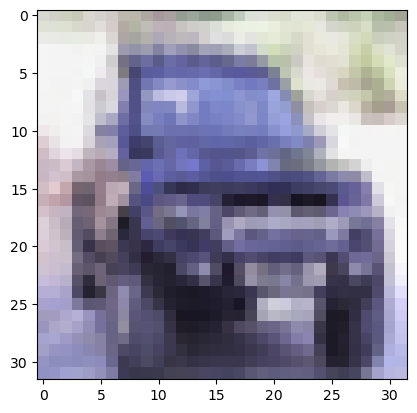

In [19]:
test()